In [ ]:
import sys
import pandas as pd
import numpy as np
import anndata

from data_processing.data_loader import DataLoader
from data_processing.split_cell import split_cell
from data_processing.preprocess import Preprocess_gene
from data_processing.data import TwitterDataset
%config InlineBackend.figure_format = 'svg'

In [ ]:
#Input the gene expression matrix, with gene names as row names and cell names as column names.
import pandas as pd
import numpy as np

expression_df = pd.read_csv('./example/testis_merge_matrix.csv',index_col=0)
expression_df

Donor2-AAACCTGGTGCCTTGG-1  Donor2-AAACCTGTCAACGGGA-1  \
Gene                                                                 
A1BG                                0.0                        0.0   
A1BG-AS1                            0.0                        0.0   
A1CF                                NaN                        NaN   
A2M                                 0.0                        0.0   
A2M-AS1                             0.0                        0.0   
...                                 ...                        ...   
ZYG11B                              0.0                        0.0   
ZYX                                 0.0                        0.0   
ZZEF1                               0.0                        0.0   
ZZZ3                                0.0                        0.0   
bP-21264C1.2                        0.0                        0.0   

              Donor2-AAACCTGTCCTATGTT-1  Donor2-AAACCTGTCGGACAAG-1  \
Gene                                                                 
A1BG                                0.0                        0.0   
A1BG-AS1                            0.0                        0.0   
A1CF                                NaN                        NaN   
A2M                                 0.0                        0.0   
A2M-AS1                             0.0                        0.0   
...                                 ...                        ...   
ZYG11B                              0.0                        0.0   
ZYX                                 0.0                        0.0   
ZZEF1                               0.0                        0.0   
ZZZ3                                0.0                        0.0   
bP-21264C1.2                        0.0                        0.0   

              Donor2-AAACGGGAGCTATGCT-1  Donor2-AAACGGGGTCTGGAGA-1  \
Gene                                                                 
A1BG                                0.0                        0.0   
A1BG-AS1                            0.0                        0.0   
A1CF                                NaN                        NaN   
A2M                                 0.0                        0.0   
A2M-AS1                             0.0                        0.0   
...                                 ...                        ...   
ZYG11B                              0.0                        0.0   
ZYX                                 0.0                        0.0   
ZZEF1                               1.0                        0.0   
ZZZ3                                0.0                        0.0   
bP-21264C1.2                        0.0                        0.0   

              Donor2-AAACGGGTCTCTAAGG-1  Donor2-AAATGCCAGTGTTTGC-1  \
Gene                                                                 
A1BG                                0.0                        0.0   
A1BG-AS1                            0.0                        0.0   
A1CF                                NaN                        NaN   
A2M                                 0.0                        0.0   
A2M-AS1                             0.0                        0.0   
...                                 ...                        ...   
ZYG11B                              0.0                        0.0   
ZYX                                 0.0                        0.0   
ZZEF1                               0.0                        1.0   
ZZZ3                                0.0                        0.0   
bP-21264C1.2                        0.0                        0.0   

              Donor2-AAATGCCGTTAGTGGG-1  Donor2-AAATGCCGTTCGTCTC-1  ...  \
Gene                                                                ...   
A1BG                                0.0                        0.0  ...   
A1BG-AS1                            0.0                        0.0  ...   
A1CF                                NaN                        NaN  ..

In [4]:
obs_df=pd.read_csv('./example/testis_merge_type.csv')
obs_df

Batch                  Cell_Name              Type
0      10X  Donor2-AAACCTGGTGCCTTGG-1  Elongated S'tids
1      10X  Donor2-AAACCTGTCAACGGGA-1             Sperm
2      10X  Donor2-AAACCTGTCCTATGTT-1             Sperm
3      10X  Donor2-AAACCTGTCGGACAAG-1             Sperm
4      10X  Donor2-AAACGGGAGCTATGCT-1             Sperm
...    ...                        ...               ...
9339   SS2            N3_TESTIS_11_38             Sperm
9340   SS2            N3_TESTIS_12_14             Sperm
9341   SS2            N3_TESTIS_12_35             Sperm
9342   SS2            N3_TESTIS_12_37             Sperm
9343   SS2                    1_SY_23             Sperm

[9344 rows x 3 columns]

In [ ]:
#Process the metadata and the corresponding data.
loader1 = DataLoader(expression_matrix_1=expression_df, cell_labels_1=obs_df, top_genes=1000, mode="target",cell_name_column='Cell_Name')

ref_dat, ref_label, ref_cell_labels = loader1.process_data()

print("Updated ref_cell_labels:")
print(ref_cell_labels)

更新后的 ref_cell_labels:
     Batch                  Cell_Name              Type cell_id    mode
0      10X  Donor2-AAACCTGGTGCCTTGG-1  Elongated S'tids     1_1  target
1      10X  Donor2-AAACCTGTCAACGGGA-1             Sperm     1_2  target
2      10X  Donor2-AAACCTGTCCTATGTT-1             Sperm     1_3  target
3      10X  Donor2-AAACCTGTCGGACAAG-1             Sperm     1_4  target
4      10X  Donor2-AAACGGGAGCTATGCT-1             Sperm     1_5  target
...    ...                        ...               ...     ...     ...
9339   SS2            N3_TESTIS_11_38             Sperm  1_9340  target
9340   SS2            N3_TESTIS_12_14             Sperm  1_9341  target
9341   SS2            N3_TESTIS_12_35             Sperm  1_9342  target
9342   SS2            N3_TESTIS_12_37             Sperm  1_9343  target
9343   SS2                    1_SY_23             Sperm  1_9344  target

[9344 rows x 5 columns]


In [ ]:
#Encode genes using the trained w2v model. The default path uses the trained model.
#If you have your own trained w2v vectors, you can add them manually—make sure the version number matches.
preprocess = Preprocess_gene(ref_dat, sen_len=1000)
embedding = preprocess.make_embedding()
gene_name = preprocess.sentence_word2idx()
gene_label = preprocess.labels_to_tensor(ref_label)

Get embedding ...
loading word to vec model ...
get words #84312
total words: 84315


In [ ]:
#Switch the mode to "single" for the application process.
ref_dataset = TwitterDataset(x=gene_name, z=gene_label, mode="single")

In [ ]:
#Use the trained AlignCell model for the cell embedding process.
from get_result.Get_emb import AlignCell_Emb
from AlignCell import TransformerEncoder, PositionalEncoding, EncoderLayer, FeedForward

emb_dat=AlignCell_Emb("./end_testis/FineTurn_no_mtDNA.model")
ref_label, ref_embed=emb_dat.get_embeddings(ref_dataset)

aligncell_emb=emb_dat.generate_dataframe(ref_embed, ref_label, dataset=ref_dataset)
aligncell_emb.index=ref_cell_labels['Cell_Name']
aligncell_emb

In [ ]:
#Write the aligncell_emb into the object constructed by Scanpy for subsequent dimensionality reduction analysis.
#adata.obsm["AlignCell"] =aligncell_emb.values

In [ ]:
#Use the UMAP parameters in Python for dimensionality reduction and plotting.
#The results may differ slightly from those produced by Scanpy due to different default settings or parameter configurations.
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
reducer = umap.UMAP(n_jobs=1, random_state=1)
umap_embedding = reducer.fit_transform(aligncell_emb)
#Create a new DataFrame to store the results of the dimensionality reduction.
embedding_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['Source'] = ref_cell_labels['Batch'].tolist()
embedding_df['Cell_Name'] = ref_cell_labels['Cell_Name'].tolist()
embedding_df['Type'] = ref_cell_labels['Type'].tolist()

/Gao2/dzh/micromamba/envs/deep/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


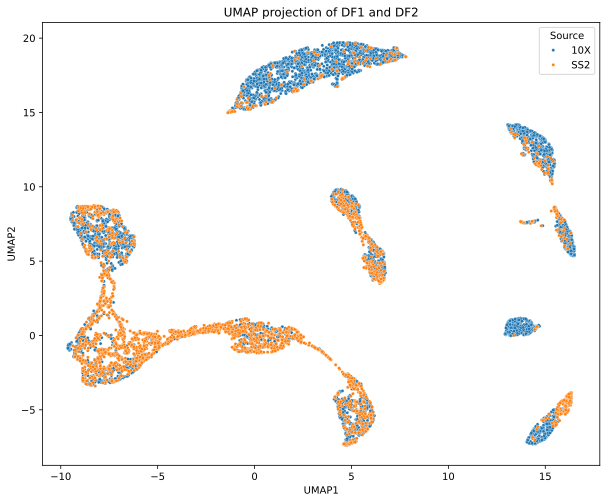

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='Source', alpha=1, s=10)
plt.title('UMAP projection of DF1 and DF2')
plt.show()

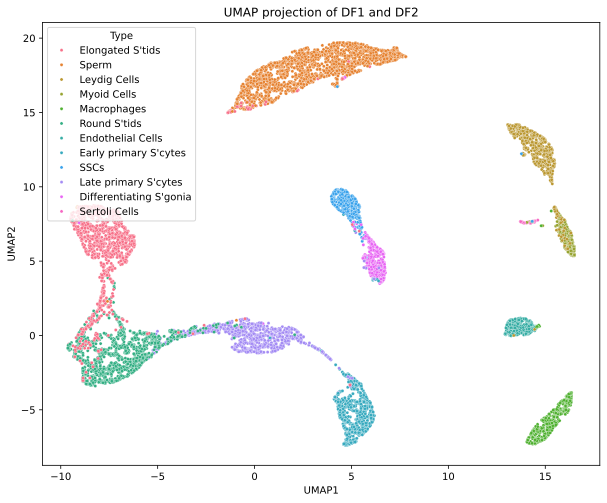

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='Type',alpha=1, s=10)
plt.title('UMAP projection of DF1 and DF2')
plt.show()